#Numpy and Linear Regression

Numpy component of the tutorial is heavily influenced from [cs231n](https://cs231n.github.io/) course material.

##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [74]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [75]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)
b = np.array([[1,2, 3],[3,4, 5]])
b.shape       

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


(2, 3)

In [76]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


Numpy also provides many functions to create arrays:

In [77]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [78]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [79]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [80]:
d = np.eye(5)        # Create a 2x2 identity matrix
print(d)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [81]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.08400953 0.93995768]
 [0.14513075 0.35638836]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [82]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


**Q. Slice bottom-left (2,2) matrix:**
```
[[ 5,  6],
[ 9, 10]]
```

In [83]:
## Q. Slice bottom-left (2,2) matrix:

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [84]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 
a

2
77


array([[ 1, 77,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [85]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [86]:
# import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [87]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [88]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [89]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [90]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [91]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [92]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [93]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [94]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [95]:
print(v @ w)

219


In [96]:
x.shape, v.shape, x.dot(v).shape

((2, 2), (2,), (2,))

In [97]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [98]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [99]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [100]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [101]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [102]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

print(x.shape,v.shape)

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    print(x[i, :])
    y[i, :] = x[i, :] + v

print(y)

(4, 3) (3,)
[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [103]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [104]:
vv.shape

(4, 3)

In [105]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [106]:
# import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)
print(np.array([1, 0, 1]).shape)

print(np.array([[1, 0, 1]]).shape)

print(np.array([[1, 0, 1],
 [1, 0, 1],
 [1, 0, 1],
 [1, 0, 1]]).shape)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
(3,)
(1, 3)
(4, 3)


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [107]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
[1,2,3]
print(np.reshape(v, (3, 1)) * w)

#4,3
## 3, => 1,3 => 4,3

[[ 4  5]
 [ 8 10]
 [12 15]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [108]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [109]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

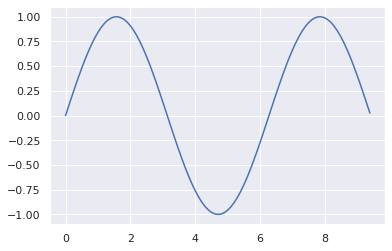

In [110]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

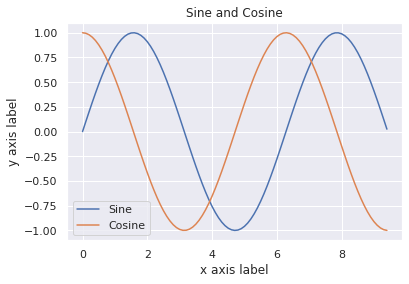

In [111]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

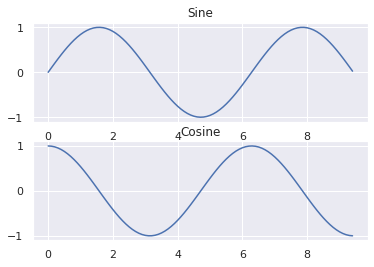

In [112]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Linear Regression

In [113]:
import pandas as pd
import numpy as np

In [114]:
## Downloads the zip file
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2021-08-16 06:07:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.1’

student.zip.1       100%[===================>]  20.00K  --.-KB/s    in 0.07s   

2021-08-16 06:07:48 (292 KB/s) - ‘student.zip.1’ saved [20478/20478]



In [115]:
## Uncompress the file content
!unzip student.zip

Archive:  student.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [116]:
stu_df = pd.read_csv("student-mat.csv", sep=';')
stu_df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [117]:
import seaborn as sns
sns.set_theme(style="darkgrid")

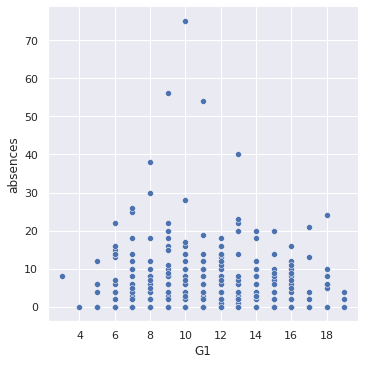

In [118]:
sns.relplot(x="G1", y="absences", data=stu_df)

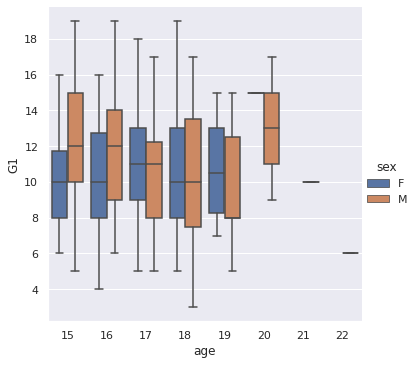

In [119]:
sns.catplot(x="age", y="G1", kind="box", hue='sex', data=stu_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


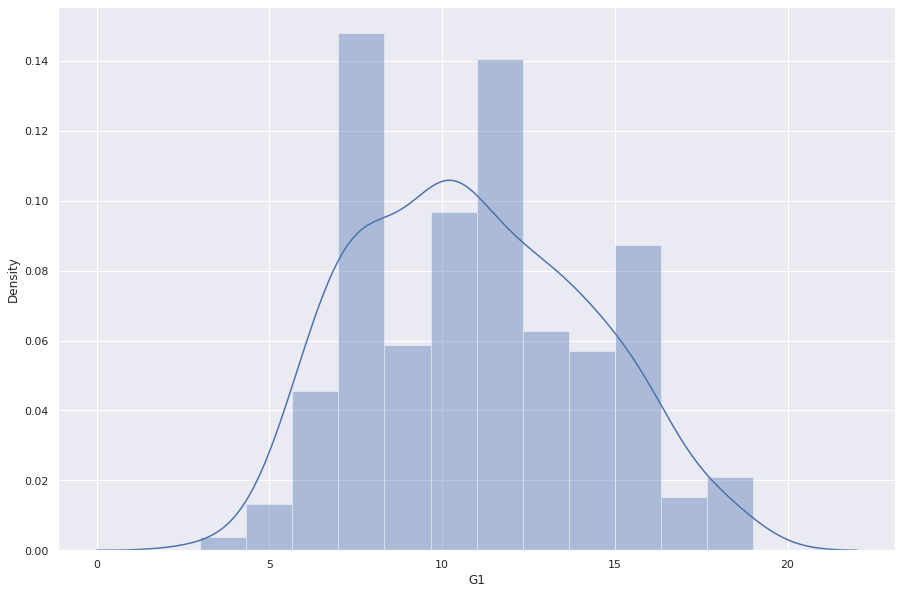

In [120]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(stu_df['G1'])

In [121]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [122]:
cols = ['age', "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", 
        "freetime", "goout", "Dalc", "Walc", "health", "absences"]
x = stu_df[cols].values
x

array([[18,  4,  4, ...,  1,  3,  6],
       [17,  1,  1, ...,  1,  3,  4],
       [15,  1,  1, ...,  3,  3, 10],
       ...,
       [21,  1,  1, ...,  3,  3,  3],
       [18,  3,  2, ...,  4,  5,  0],
       [19,  1,  1, ...,  3,  5,  5]])

In [123]:
y1 = stu_df[['G1']].values
y1[:5]

array([[ 5],
       [ 5],
       [ 7],
       [15],
       [ 6]])

In [124]:
## Split data for evaluation purposes:
train_size = 0.7
train_count = int(x.shape[0] * train_size)
x_train, y1_train = x[:train_count], y1[:train_count]
x_test, y1_test = x[train_count:], y1[train_count:]

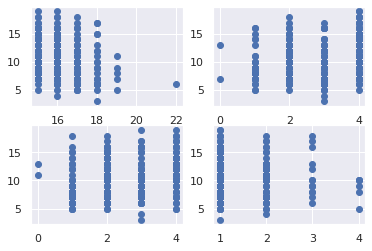

In [125]:
fig,axs = plt.subplots(2,2)
axs[0, 0].plot(x_train[:,0],y1_train,'o')
axs[0, 1].plot(x_train[:,1],y1_train,'o')
axs[1, 0].plot(x_train[:,2],y1_train,'o')
axs[1, 1].plot(x_train[:,3],y1_train,'o')

In [126]:
# Check correlation of each input with the input
from scipy.stats import pearsonr
print(f'Correlation between x1 (age) and y = {pearsonr(x_train[:,0],y1_train[:,0])[0]:.2f}')
print(f'Correlation between x2 (Medu) and y = {pearsonr(x_train[:,1],y1_train[:,0])[0]:.2f}')
print(f'Correlation between x3 (Fedu) and y = {pearsonr(x_train[:,2],y1_train[:,0])[0]:.2f}')

Correlation between x1 (age) and y = -0.22
Correlation between x2 (Medu) and y = 0.24
Correlation between x3 (Fedu) and y = 0.21


In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model = LinearRegression()

In [129]:
result = model.fit(x_train, y1_train)

In [130]:
r_sq = model.score(x_train, y1_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
for col, sl in zip(cols, model.coef_[0]):
    print(f'Feature [{col}] has importance [{sl}]')

coefficient of determination: 0.21930457573344297
intercept: [14.62582045]
slope: [[-2.69052185e-01  4.01798507e-01  9.70018501e-02 -4.44119768e-02
  -5.45862647e-02 -1.44060908e+00 -5.51650460e-04  3.23112216e-01
  -3.85853529e-01 -4.27700187e-02  9.49239893e-02 -8.60484035e-02
  -9.32203761e-03]]
Feature [age] has importance [-0.26905218463796254]
Feature [Medu] has importance [0.4017985074024193]
Feature [Fedu] has importance [0.09700185005969925]
Feature [traveltime] has importance [-0.044411976806779115]
Feature [studytime] has importance [-0.05458626473634386]
Feature [failures] has importance [-1.4406090846152617]
Feature [famrel] has importance [-0.0005516504595496057]
Feature [freetime] has importance [0.32311221644102045]
Feature [goout] has importance [-0.3858535287069817]
Feature [Dalc] has importance [-0.04277001874111573]
Feature [Walc] has importance [0.0949239892840226]
Feature [health] has importance [-0.0860484034592767]
Feature [absences] has importance [-0.009322037

In [131]:
len(cols), len(model.coef_)
# len(cols), len(model.coef_[0])

(13, 1)

In [132]:
y_pred = model.predict(x_test)
for i,j in zip(y1_test, y_pred):
    print(f'Original {i}, Predicted {j}')

Original [10], Predicted [9.84209508]
Original [9], Predicted [10.6095236]
Original [9], Predicted [9.49995021]
Original [10], Predicted [11.01058099]
Original [8], Predicted [11.26691211]
Original [11], Predicted [9.47467533]
Original [12], Predicted [9.63095832]
Original [8], Predicted [9.5006337]
Original [10], Predicted [9.93592028]
Original [12], Predicted [9.99095889]
Original [18], Predicted [10.31025149]
Original [13], Predicted [9.89020889]
Original [15], Predicted [9.58988585]
Original [15], Predicted [11.5527869]
Original [12], Predicted [11.43005885]
Original [15], Predicted [11.50320564]
Original [12], Predicted [8.73146393]
Original [18], Predicted [10.33498841]
Original [14], Predicted [11.08106521]
Original [14], Predicted [11.3564896]
Original [10], Predicted [10.76298824]
Original [10], Predicted [10.72581962]
Original [14], Predicted [11.02190189]
Original [16], Predicted [12.17092382]
Original [12], Predicted [10.30255359]
Original [11], Predicted [11.51284253]
Orig

Q. Add mean-var plot

In [133]:
## Q. Add mean-var plot

In [134]:
gwp_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv')
gwp_df.head(3)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


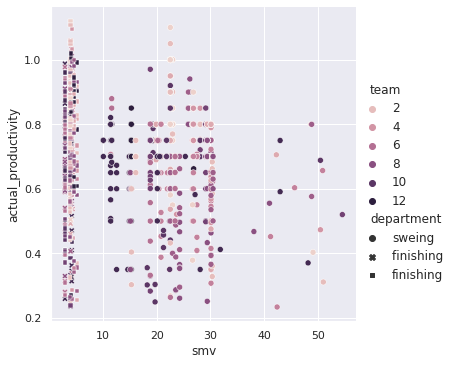

In [135]:
sns.relplot(x="smv", y="actual_productivity", hue="team", style="department", data=gwp_df)

In [136]:
fmri = sns.load_dataset("fmri")

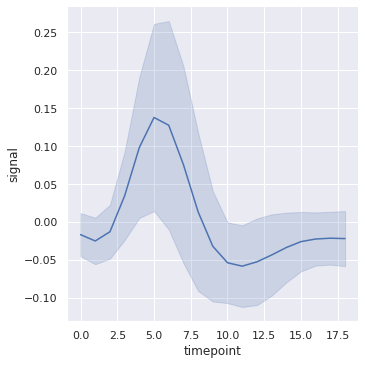

In [137]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

In [138]:
tips = sns.load_dataset("tips")

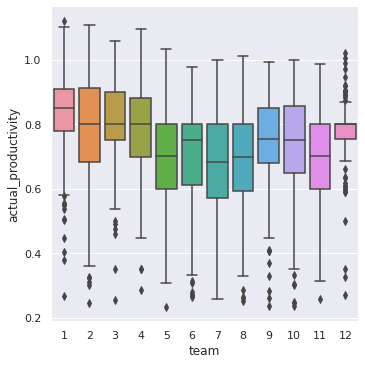

In [139]:
sns.catplot(x="team", y="actual_productivity", kind="box", data=gwp_df)

In [140]:
gwp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**Q. Apply Linear Regression on gwp_df data**

In [141]:
## Q. Apply Linear Regression on gwp_df data

Similar functions for other algorithms, can be easily applied.

In [142]:
from sklearn import svm

In [143]:
clf = svm.SVC(kernel='linear')

In [144]:
clf.fit(x_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
y_pred_svm = clf.predict(x_test)

In [146]:
r_sq = model.score(x_test, y1_test)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
for col, sl in zip(cols, model.coef_[0]):
    print(f'Feature [{col}] has importance [{sl}]')

coefficient of determination: 0.11923292479682324
intercept: [14.62582045]
slope: [[-2.69052185e-01  4.01798507e-01  9.70018501e-02 -4.44119768e-02
  -5.45862647e-02 -1.44060908e+00 -5.51650460e-04  3.23112216e-01
  -3.85853529e-01 -4.27700187e-02  9.49239893e-02 -8.60484035e-02
  -9.32203761e-03]]
Feature [age] has importance [-0.26905218463796254]
Feature [Medu] has importance [0.4017985074024193]
Feature [Fedu] has importance [0.09700185005969925]
Feature [traveltime] has importance [-0.044411976806779115]
Feature [studytime] has importance [-0.05458626473634386]
Feature [failures] has importance [-1.4406090846152617]
Feature [famrel] has importance [-0.0005516504595496057]
Feature [freetime] has importance [0.32311221644102045]
Feature [goout] has importance [-0.3858535287069817]
Feature [Dalc] has importance [-0.04277001874111573]
Feature [Walc] has importance [0.0949239892840226]
Feature [health] has importance [-0.0860484034592767]
Feature [absences] has importance [-0.009322037

In [148]:
# y_pred = model.predict(x)
for i,j in zip(y1_test, y_pred_svm):
    print(f'SVM Original {i}, Predicted [{j}]')

SVM Original [10], Predicted [9]
SVM Original [9], Predicted [10]
SVM Original [9], Predicted [5]
SVM Original [10], Predicted [17]
SVM Original [8], Predicted [18]
SVM Original [11], Predicted [7]
SVM Original [12], Predicted [7]
SVM Original [8], Predicted [7]
SVM Original [10], Predicted [6]
SVM Original [12], Predicted [8]
SVM Original [18], Predicted [7]
SVM Original [13], Predicted [7]
SVM Original [15], Predicted [6]
SVM Original [15], Predicted [11]
SVM Original [12], Predicted [3]
SVM Original [15], Predicted [13]
SVM Original [12], Predicted [9]
SVM Original [18], Predicted [10]
SVM Original [14], Predicted [9]
SVM Original [14], Predicted [12]
SVM Original [10], Predicted [10]
SVM Original [10], Predicted [5]
SVM Original [14], Predicted [10]
SVM Original [16], Predicted [14]
SVM Original [12], Predicted [6]
SVM Original [11], Predicted [12]
SVM Original [15], Predicted [7]
SVM Original [17], Predicted [13]
SVM Original [15], Predicted [5]
SVM Original [14], Predicted [7]
SV